# Importing Library

### https://www.kaggle.com/datasets/rabisingh/symptom-checker

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import csv,numpy as np,pandas as pd
import numpy as np
#from fcmeans import FCM
from matplotlib import pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore") 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Data Read and Data split

In [36]:
data = pd.read_csv ('../input/symptom-checker/Training.csv',encoding='utf-8')
df = pd.DataFrame(data)
cols = df.columns
cols = cols[:-1]
x = df[cols]
y = df['prognosis']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Data Stats

In [37]:
df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Analysis and Visualization

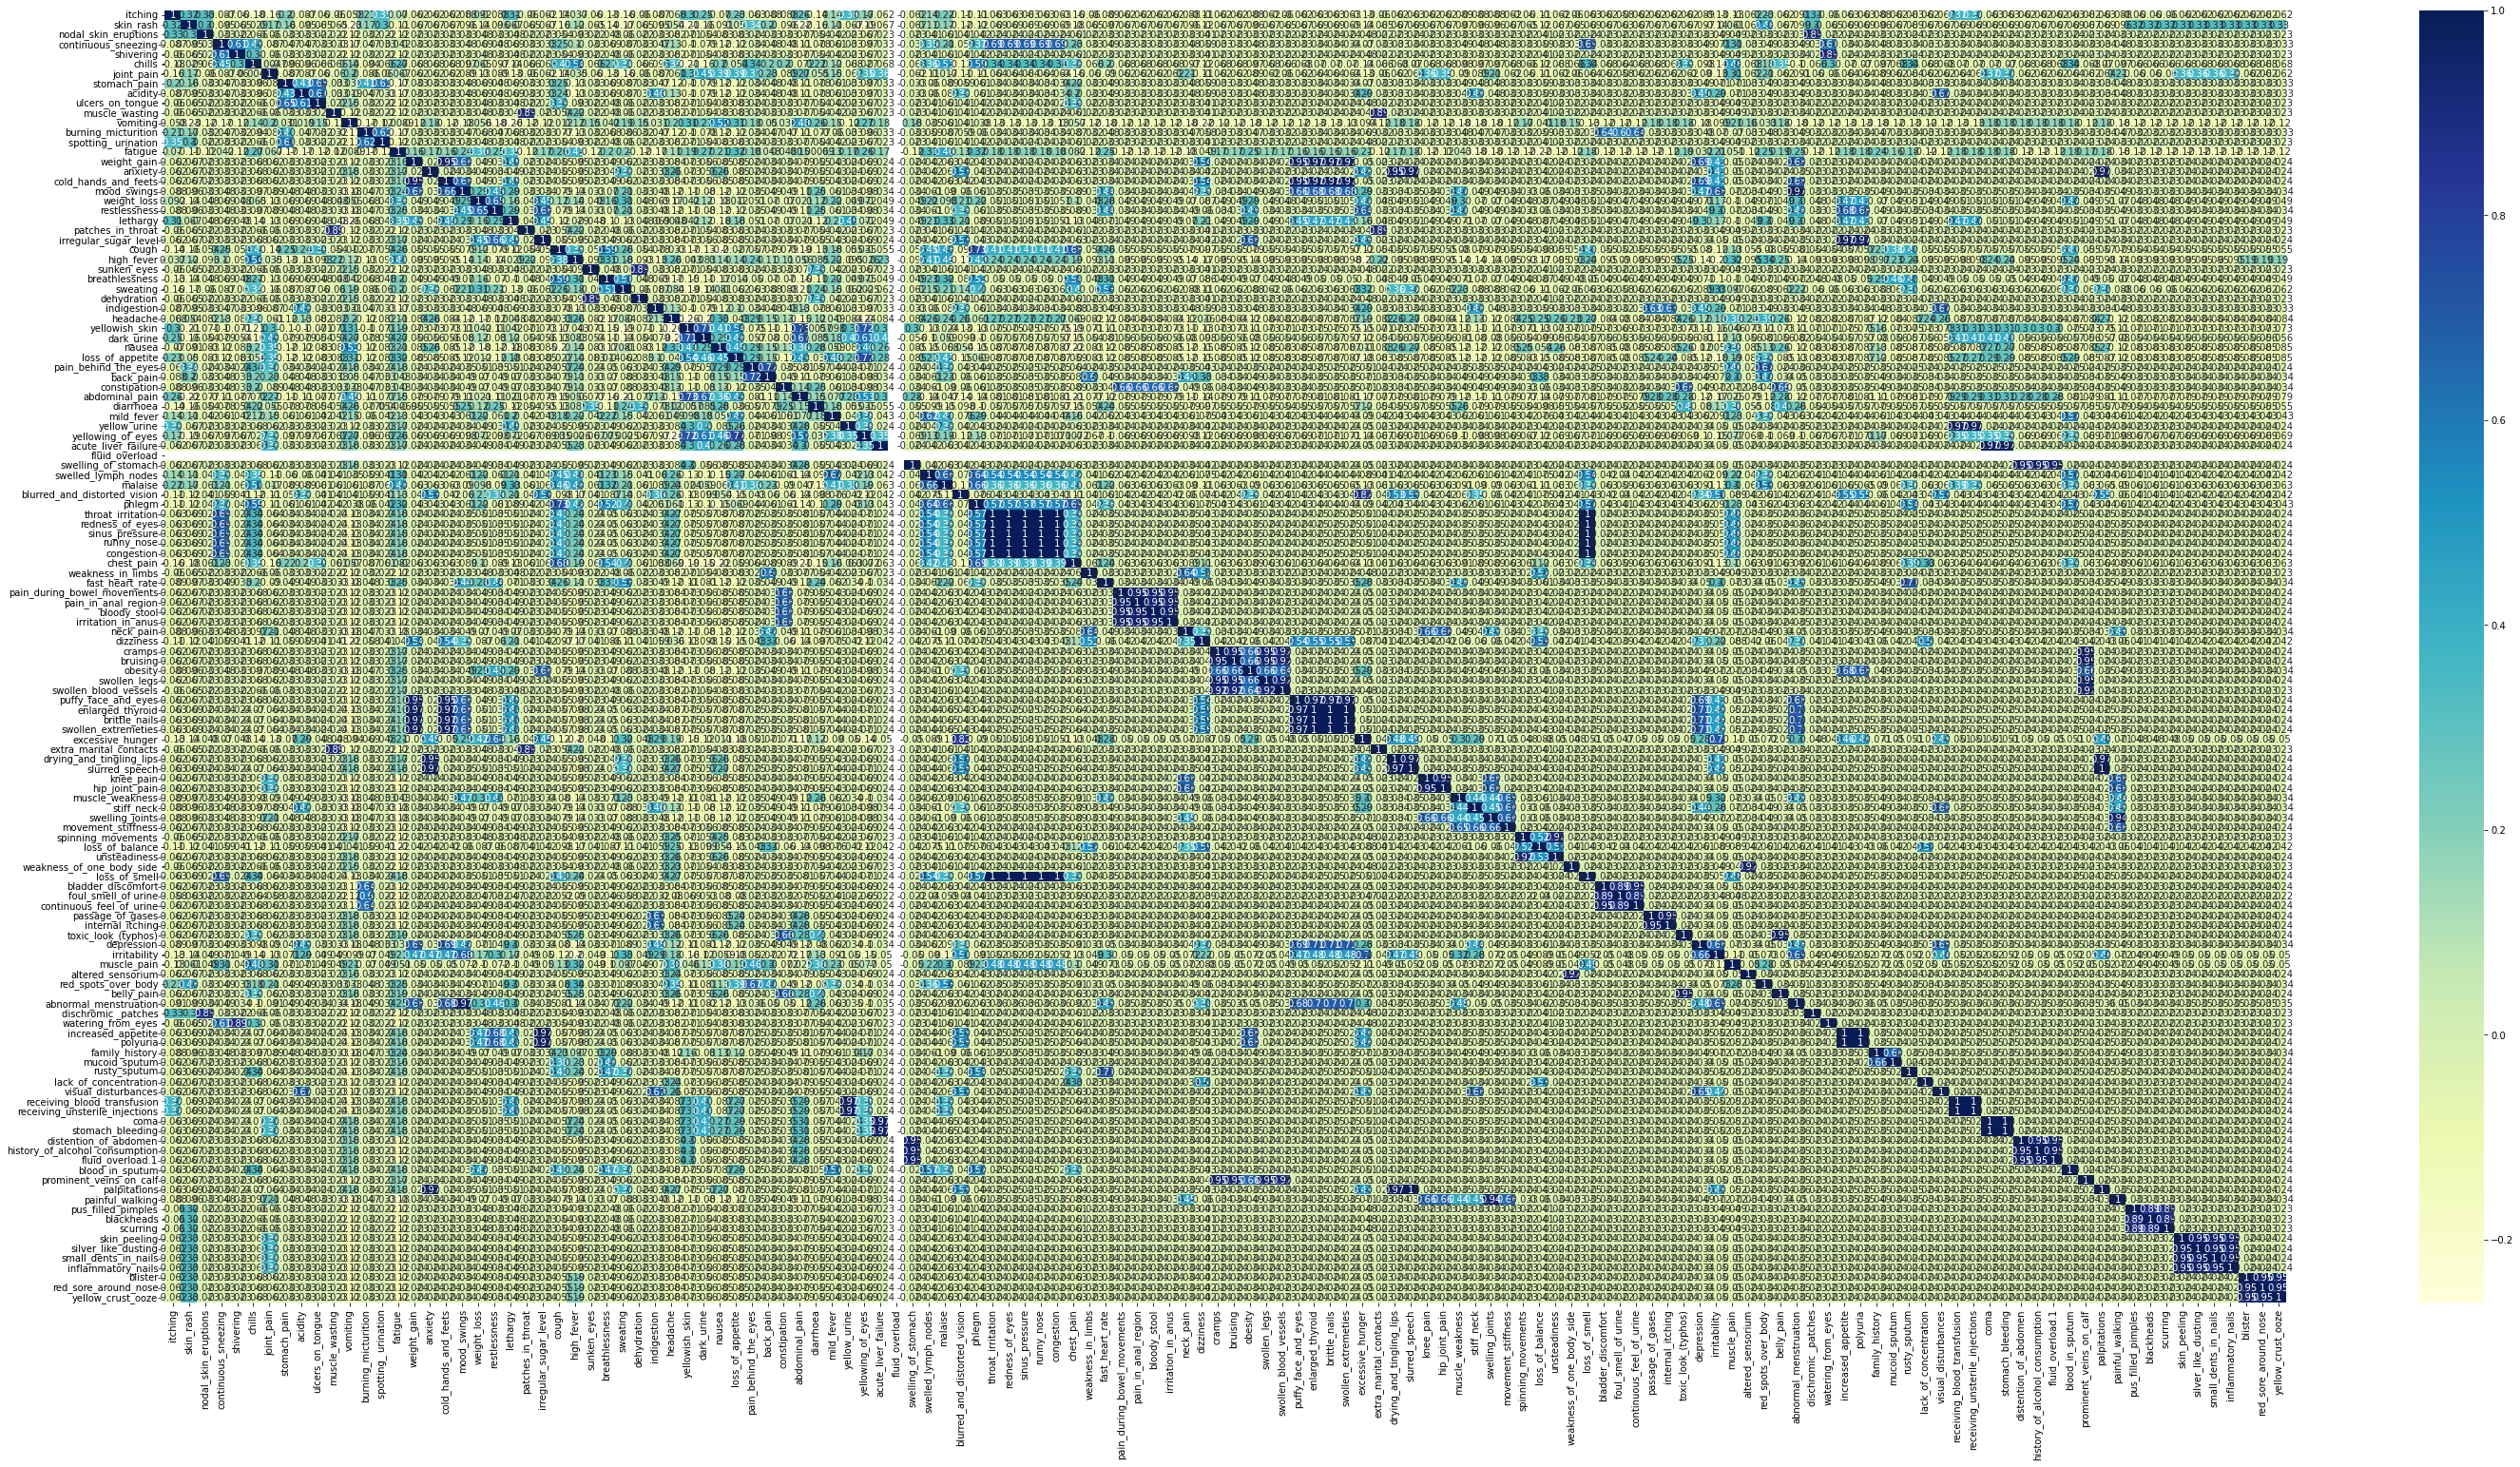

In [38]:
fig, ax = plt.subplots(figsize=(50,25))
sns.heatmap(df.corr(),cmap="YlGnBu", annot=True)
plt.show()

In [39]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

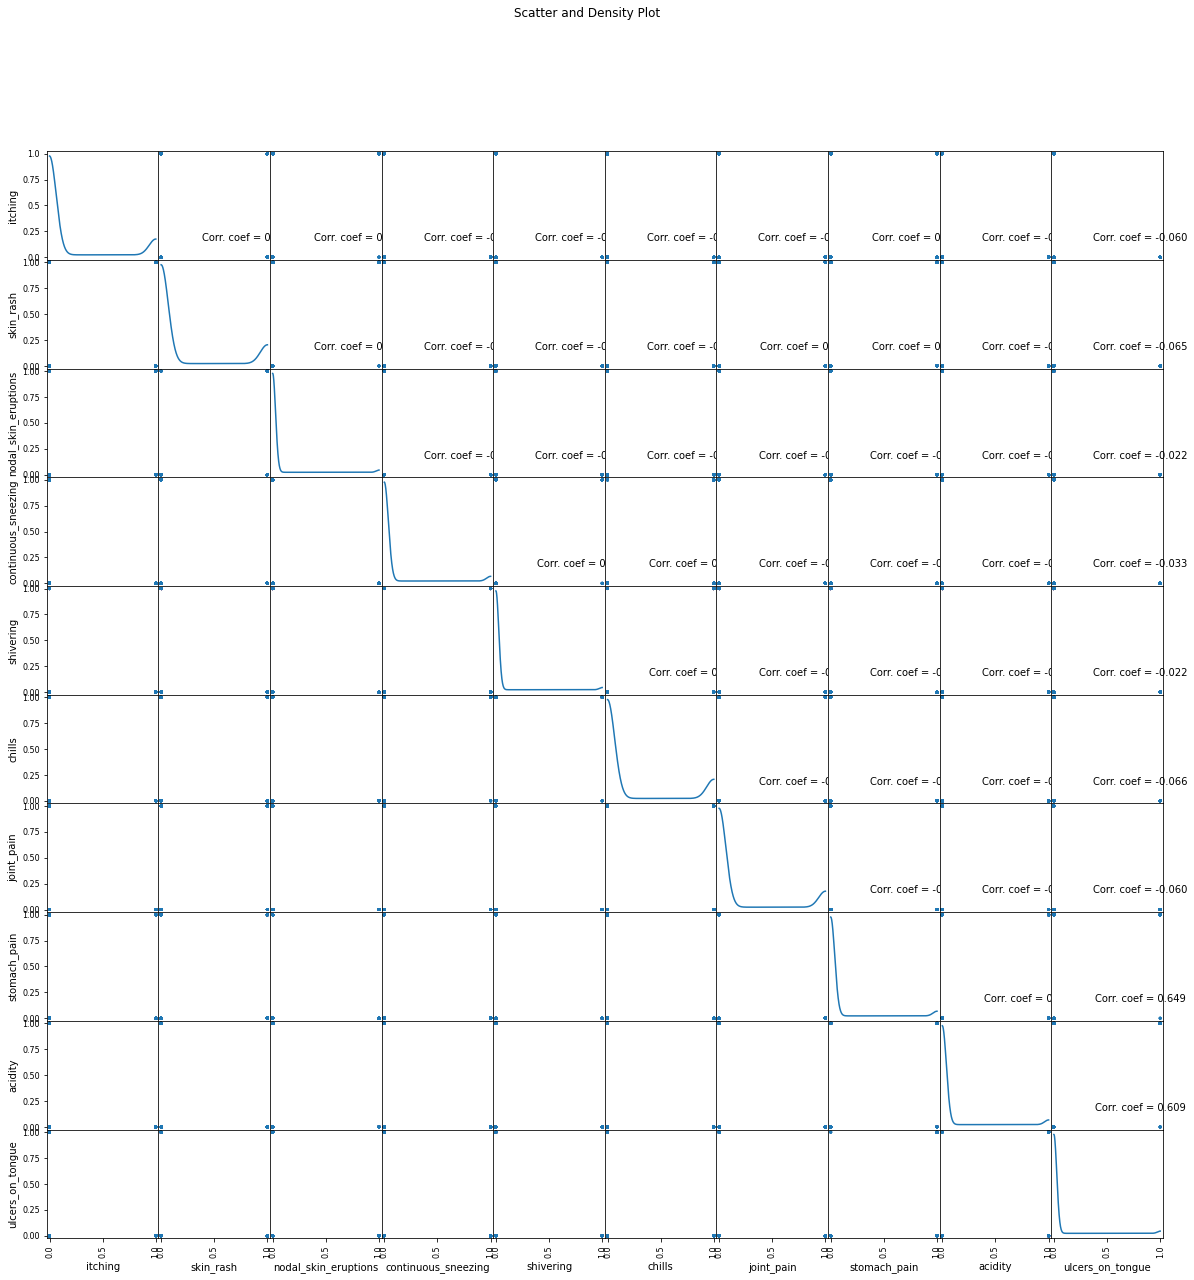

In [40]:
plotScatterMatrix(df, 20, 10)

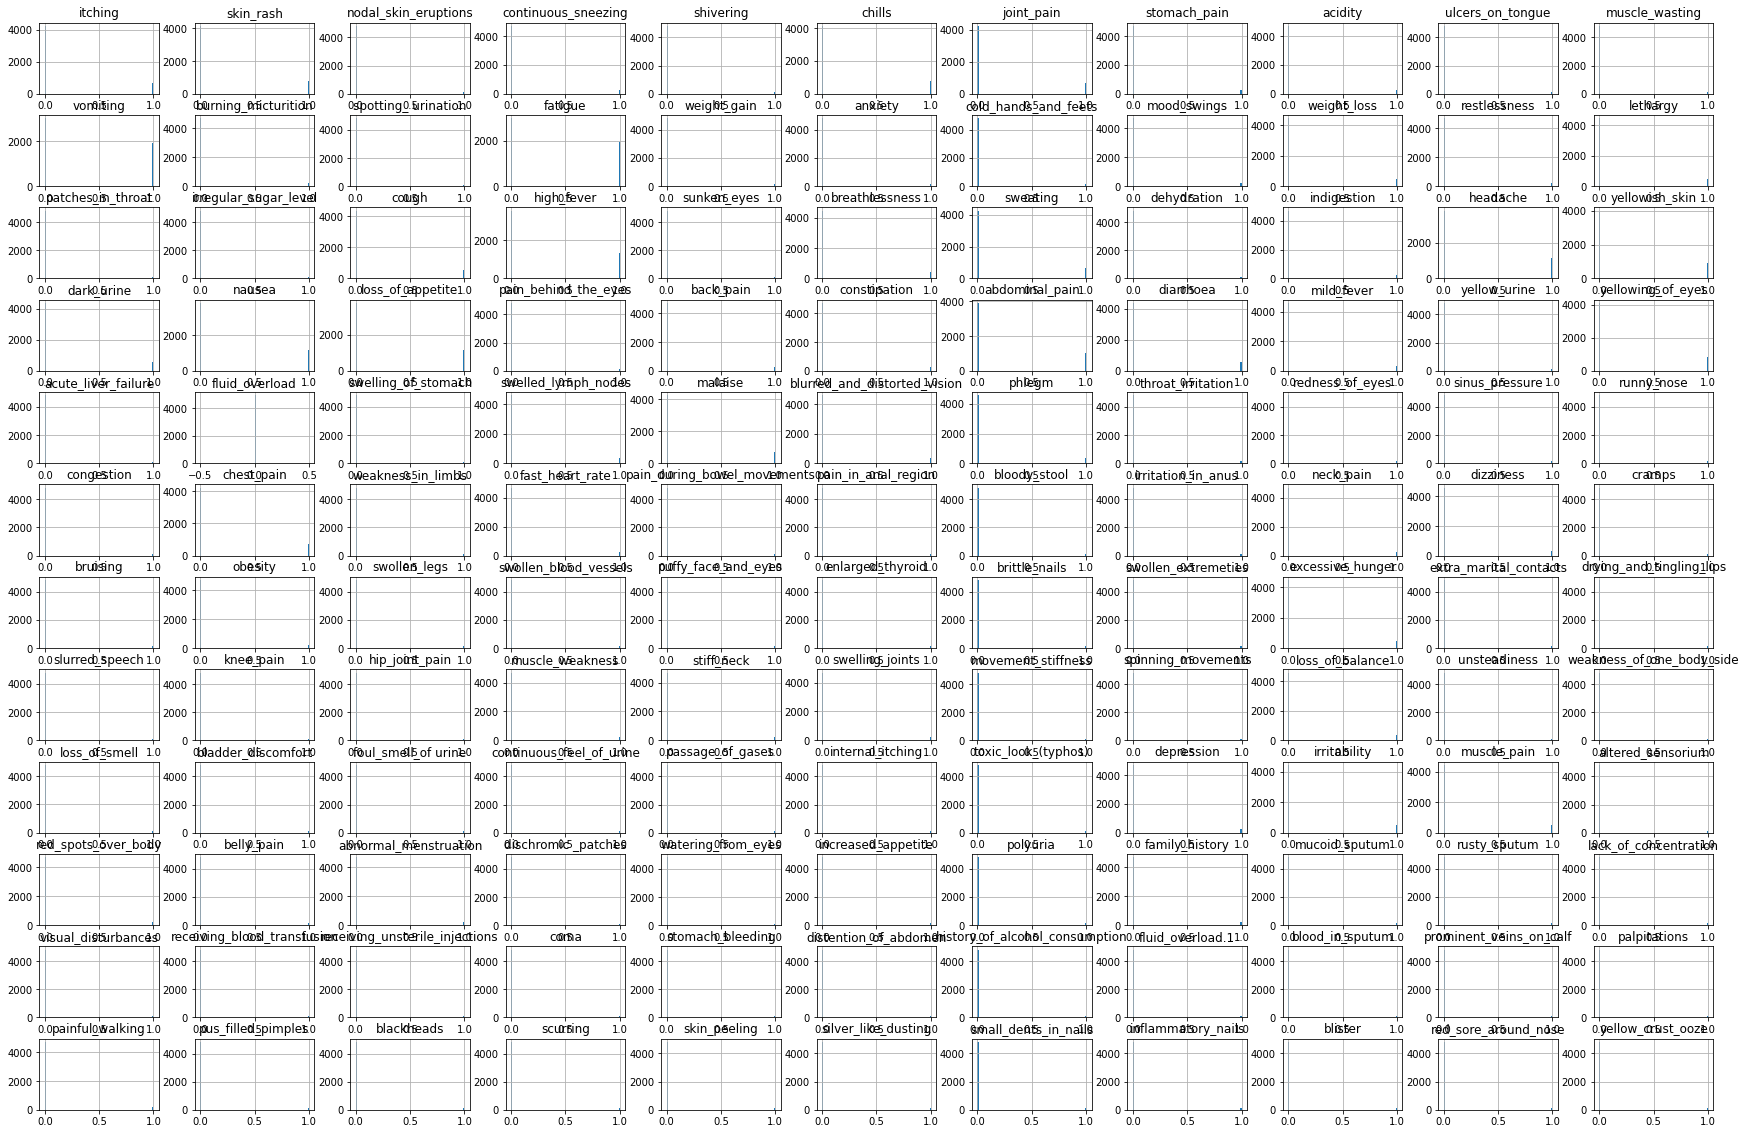

In [41]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(30, 20))
df.hist(bins=100, ax=ax1)
plt.show()

# Decision Tree

In [42]:
print ("DecisionTree")
dt = DecisionTreeClassifier()
clf_dt=dt.fit(X_train,y_train)
print ("Acurracy: ", clf_dt.score(X_test,y_test))

DecisionTree
Acurracy:  1.0


<AxesSubplot:>

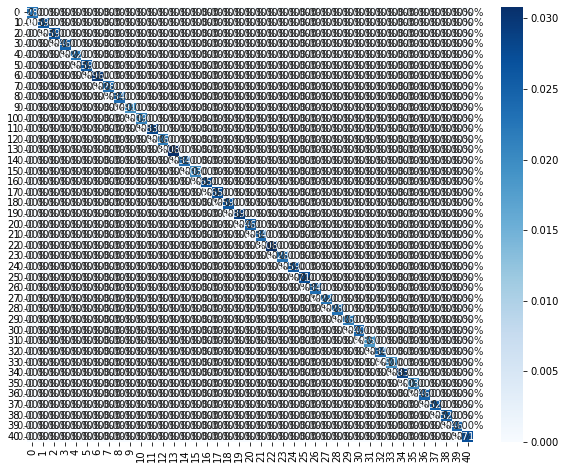

In [43]:
#Predict the response for test dataset
y_pred = clf_dt.predict(X_test)
# Confusion matrix
cf=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cf/np.sum(cf), annot=True, 
            fmt='.2%', cmap='Blues')

In [44]:
print("Classification report")
print(classification_report(y_test, y_pred))

Classification report
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        37
                                   AIDS       1.00      1.00      1.00        42
                                   Acne       1.00      1.00      1.00        42
                    Alcoholic hepatitis       1.00      1.00      1.00        40
                                Allergy       1.00      1.00      1.00        36
                              Arthritis       1.00      1.00      1.00        42
                       Bronchial Asthma       1.00      1.00      1.00        48
                   Cervical spondylosis       1.00      1.00      1.00        37
                            Chicken pox       1.00      1.00      1.00        38
                    Chronic cholestasis       1.00      1.00      1.00        31
                            Common Cold       1.00      1.00      1.00        34
     

# Fuzzy-c-means

In [45]:
!pip install fuzzy-c-means

In [47]:
from fcmeans import FCM

Fuzzy cmeans
[1]


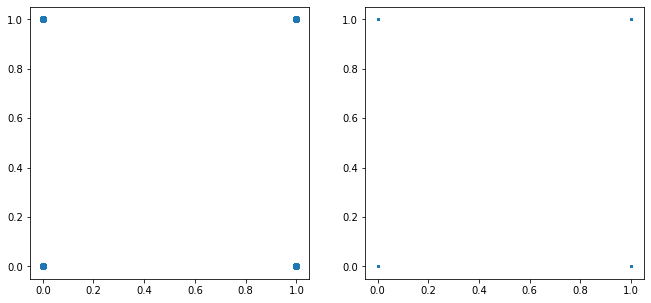

In [49]:
with open('../input/symptom-checker/Testing.csv', newline='') as f:
        reader = csv.reader(f)
        symptoms = next(reader)
        symptoms = symptoms[:len(symptoms)-1]

indices = [i for i in range(132)]
symptoms = df.columns.values[:-1]

dictionary = dict(zip(symptoms,indices))

print("Fuzzy cmeans")
#print ("Acurracy: ", fcm.score(fcm_labels))
fcm = FCM(n_clusters=5)
X=np.array(X_train)
Y=np.array(X_test)
fcm.fit(X)
# outputs
fcm_centers = fcm.centers
print(fcm.predict(Y[0]))
# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(X[:,0], X[:,1], alpha=.1)
axes[1].scatter(X[:,0], X[:,1], fcm.predict(Y[0]), alpha=.1)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='w')
plt.show()



# Testing 

In [50]:
def check(symptom):
    user_input_symptoms = symptom
    user_input_label = [0 for i in range(132)]
    for i in user_input_symptoms:
        idx = dictionary[i]
        user_input_label[idx] = 1

    user_input_label = np.array(user_input_label)
    user_input_label = user_input_label.reshape((-1,1)).transpose()
    return(dt.predict(user_input_label))

print(check(['headache','muscle_weakness','puffy_face_and_eyes','mild_fever','skin_rash']))
prediction = []
for i in range(7):
    pred = check(['headache'])
    prediction.append(pred)
print(prediction)

['Chicken pox']
[array(['Varicose veins'], dtype=object), array(['Varicose veins'], dtype=object), array(['Varicose veins'], dtype=object), array(['Varicose veins'], dtype=object), array(['Varicose veins'], dtype=object), array(['Varicose veins'], dtype=object), array(['Varicose veins'], dtype=object)]


[[-1.38125423 -1.60513302]
 [-0.85408238 -1.62006704]
 [-1.85528    -2.87217091]
 ...
 [ 2.22154491  1.82939778]
 [ 2.81217051  1.78778918]
 [ 2.9291448   1.91907273]]


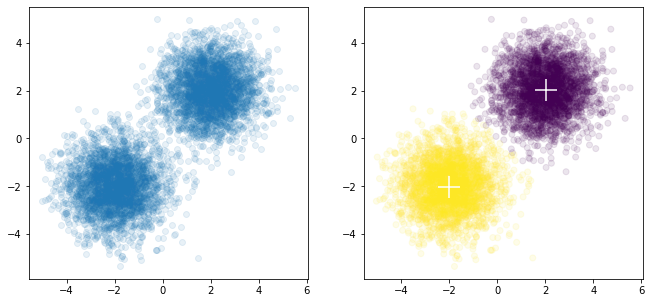

In [51]:
import numpy as np
from fcmeans import FCM
from matplotlib import pyplot as plt

n_samples = 3000

X = np.concatenate((
    np.random.normal((-2, -2), size=(n_samples, 2)),
    np.random.normal((2, 2), size=(n_samples, 2))
))

print(X)
fcm = FCM(n_clusters=2)
fcm.fit(X)

# outputs
fcm_centers = fcm.centers
fcm_labels = fcm.predict(X)

# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(X[:,0], X[:,1], alpha=.1)
axes[1].scatter(X[:,0], X[:,1], c=fcm_labels, alpha=.1)
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='w')
plt.savefig('basic-clustering-output.jpg')
plt.show()

# K Means

In [52]:
from sklearn.cluster import KMeans

# Clustering

In [88]:
kmeans = KMeans(5)
kmeans.fit(x)

KMeans(n_clusters=5)

# Clustering Results

In [89]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [90]:
x.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling',
       'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails',
       'blister', 'red_sore_around_nose', 'yellow_crust_ooze'],
      dtype='object', length=132)

In [91]:
data_with_clusters['Clusters']

0       1
1       1
2       1
3       1
4       1
       ..
4915    8
4916    1
4917    1
4918    1
4919    1
Name: Clusters, Length: 4920, dtype: int32

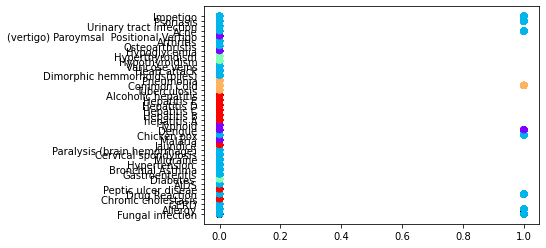

In [92]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(x['itching'],x['shivering'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.scatter(x['skin_rash'],y,c=data_with_clusters['Clusters'],cmap='rainbow')
plt.scatter(x['nodal_skin_eruptions'],y,c=data_with_clusters['Clusters'],cmap='rainbow')
plt.scatter(x['continuous_sneezing'],y,c=data_with_clusters['Clusters'],cmap='rainbow')
plt.scatter(x['shivering'],y,c=data_with_clusters['Clusters'],cmap='rainbow')

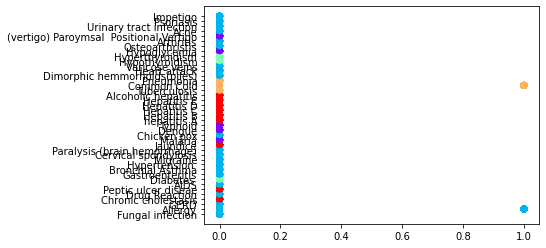

In [93]:
plt.scatter(x['continuous_sneezing'],y,c=data_with_clusters['Clusters'],cmap='rainbow')

Text(0, 0.5, 'WCSS')

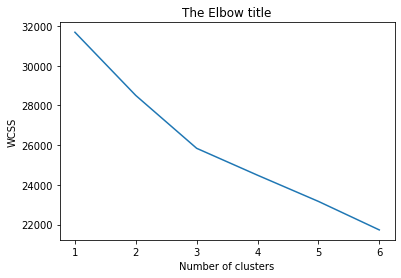

In [94]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')